In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [3]:
world_size = 20

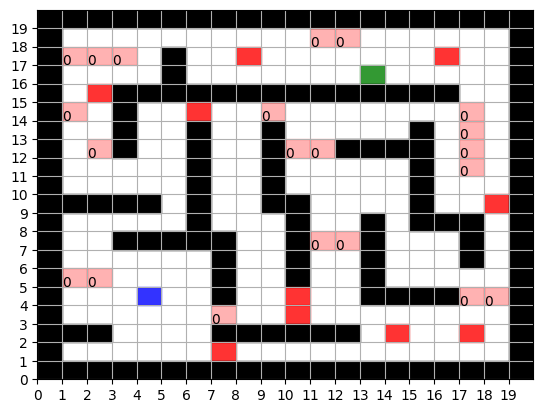

In [11]:

world =\
"""wwwwwwwwwwwwwwwwwwww
w          bb      w
wbbb w  o       o  w
w    w       e     w
w owwwwwwwwwwwwww  w
wb w  o  b       b w
w  w  w  w     w b w
w bw  w  wbbwwww b w
w     w  w     w b w
w     w  w     w   w
wwwww w  ww    w  ow
w     w   w  w www w
w  wwwww  wbbw   w w
w      w  w  w   w w
wbb    w  w  w     w
w   s  w  o  wwwwbbw
w      b  o        w
www    wwwwww o  o w
w      o           w
wwwwwwwwwwwwwwwwwwww"""

w = world.split('\n')
gridworld = []
for i in range(len(w)):
    gridworld.append(list(w[i]))

gridplot = plt.gca()
plt.xlim(0, world_size)
plt.ylim(0, world_size)

gridplot.xaxis.set_ticks(list(range(0, world_size)))
gridplot.yaxis.set_ticks(list(range(0, world_size)))
plt.grid()

for x in range(world_size):
    for y in range(world_size):
        if gridworld[x][y] == 'w':
            rect = Rectangle((y, -x+19), 1, 1, fill=True, color='black', alpha=1)
            gridplot.add_patch(rect)
        if gridworld[x][y] == 'o':
            rect = Rectangle((y, -x+19), 1, 1, fill=True, color='red', alpha=0.8)
            gridplot.add_patch(rect)
        if gridworld[x][y] == 'b':
            rect = Rectangle((y, -x+19), 1, 1, fill=True, color='red',  alpha=0.3)
            gridplot.add_patch(rect)
            # plt.text(y, -x+19, 0)
        if gridworld[x][y] == 's':
            rect = Rectangle((y, -x+19), 1, 1, fill=True, color='blue', alpha=0.8)
            gridplot.add_patch(rect)
        if gridworld[x][y] == 'e':
            rect = Rectangle((y, -x+19), 1, 1, fill=True, color='green', alpha=0.8)
            gridplot.add_patch(rect)


In [12]:
# Action Space
A = ['U', 'D', 'L', 'R']

# Transition Probabilities
p = 0.1

# Reward
# def R(s, a, s_next):
#     reward = -1
#     if S[s_next]=='b':
#         reward = reward -10
#     if S[s_next]=='o':
#         reward = reward -5
#     if S[s_next]=='e':
#         reward = reward +200
#     return reward

In [13]:
# State Space
S_SIZE = 248

class State:
    def __init__(self, row, col, action, s_next):
        #
        self.row = row
        self.col = col
        self.s_next = s_next
        self.action = action
        #
        self.value = 0
        self.policy = ''


# initialize State Space
S_space = []
for row in range(world_size):
    for col in range(world_size):
        if gridworld[row][col] != 'w':

            # available actions
            action = []
            s_next = []
            
            if gridworld[row-1][col] != 'w' and x>1:            #up
                action.append('U')
                s_next.append( gridworld[row-1][y])

            if gridworld[row+1][col] != 'w' and row<world_size:   #down
                action.append('D')
                s_next.append( gridworld[row+1][col])

            if gridworld[row][col-1] != 'w' and col>1:            #left
                action.append('L')
                s_next.append( gridworld[row][col-1])

            if gridworld[row][col+1] != 'w' and col<world_size:   #right
                action.append('R')   
                s_next.append( gridworld[row][col+1])          

            S_space.append(State(row, col, action, s_next))

s = 247
print(S_space[s].action)
print(S_space[s].s_next)
print(S_space[s].row, S_space[s].col,)
print(len(S_space))

['U', 'L']
['w', ' ']
18 18
248


In [ ]:
# Conditions
p = 0.02
discount = 0.95
theta = 0.01


diff = 9999999
while diff >= theta:
    for s in S_space:
        v = s.value
        v_new = 